<a href="https://www.kaggle.com/code/jorgeluiscruzquispe/descarga-producto-pisco-python?scriptVersionId=177070875" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <center>Descarga puntual del producto Pisco</center>
---
Lo que sea para distraerme

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import os
import shapely
import geopandas as gpd

In [31]:
def Point_PP(data, longitude, latitude, tipo, freq):

    info = xr.load_dataset(data, decode_times = False)

    info = info.assign_coords(T = pd.date_range("1981-01-01", periods = len(info.T.data), freq = freq).strftime('%Y-%m-%d'))
        
    if (info.X == longitude).any().data == True:
        if (info.Y == latitude).any().data == True:
            # longitud coincide y latitud coincide
            
            tx = info[tipo].sel(X = longitude, Y = latitude)
        else:
            # longitud coincide y latitud no coincide
            
            i1 = float(test.Y[(test.Y > latitude).sum().data].data)
            i2 = float(test.Y[(test.Y > latitude).sum().data - 1].data)
                        
            t1 = info[tipo].sel(X = longitude, Y = i1)
            t2 = info[tipo].sel(X = longitude, Y = i2)
                        
            tx = ((t2 - t1)/(i2 - i1))*(latitude - i1) + t1
    else:
        if (info.Y == latitude).any().data == True:
            # longitud no coincide y latitud coincide
            
            i1 = float(info.X[(info.X < longitude).sum().data].data)
            i2 = float(info.X[(info.X < longitude).sum().data - 1].data)
                        
            t1 = info[tipo].sel(Y = latitude, X = i1)
            t2 = info[tipo].sel(Y = latitude, X = i2)
                        
            tx = ((t2 - t1)/(i2 - i1))*(longitude - i1) + t1
          
        else:
            # longitud no coincide y latitud no coincide
            
            y1 = float(info.Y[(info.Y > latitude).sum().data].data)
            y2 = float(info.Y[(info.Y > latitude).sum().data - 1].data)
            
            x1 = float(info.X[(info.X < longitude).sum().data].data)
            x2 = float(info.X[(info.X < longitude).sum().data - 1].data)
                        
            ty1 = info[tipo].sel(X = x1, Y = y1)
            ty2 = info[tipo].sel(X = x2, Y = y2)   
            
            tx1 = info[tipo].sel(X = x1, Y = y2)
            tx2 = info[tipo].sel(X = x2, Y = y1)
            
            # promedio de valores
            tx = (ty1 + ty2 + tx1 + tx2)/4
            
    df = pd.DataFrame({"pp" : tx.data}, 
                      index = pd.to_datetime(
                          pd.date_range("1981-01-01", periods = len(tx.T.data), freq = freq).strftime('%Y-%m-%d')
                      ))

    return df

In [2]:
%%capture
!wget https://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Prec/.v2p1/.stable/.daily/.Prec/data.nc
os.rename("data.nc", "pp_daily.nc")
!wget https://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Prec/.v2p1/.stable/.monthly/.Prec/data.nc
os.rename("data.nc", "pp_monthly.nc")

In [32]:
df = Point_PP("pp_monthly.nc", -73.8, -13.13, "Prec", "ME")

df2 = Point_PP("pp_daily.nc", -73.8, -13.13, "Prec", "d")

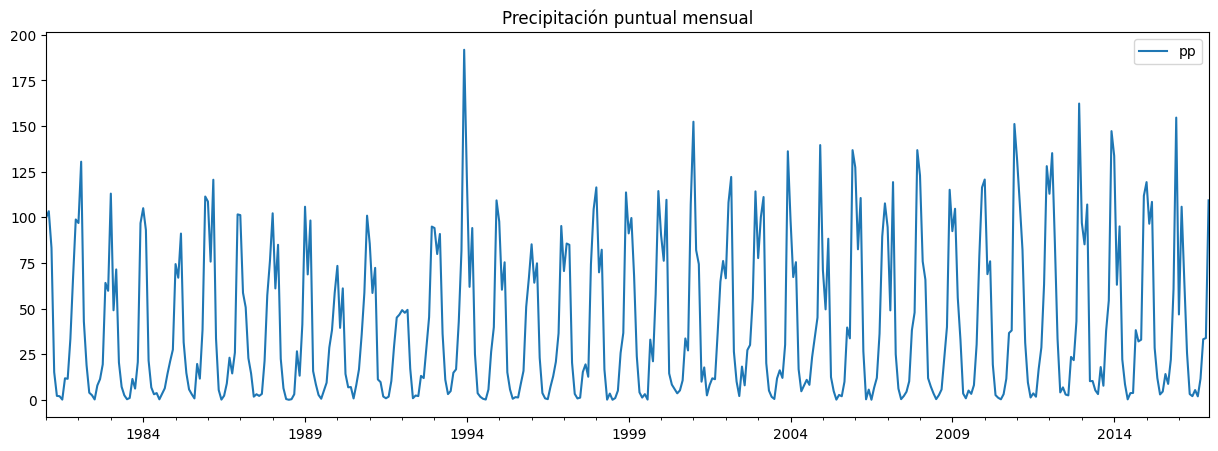

In [40]:
df.plot(figsize = (15, 5), title = "Precipitación puntual mensual");

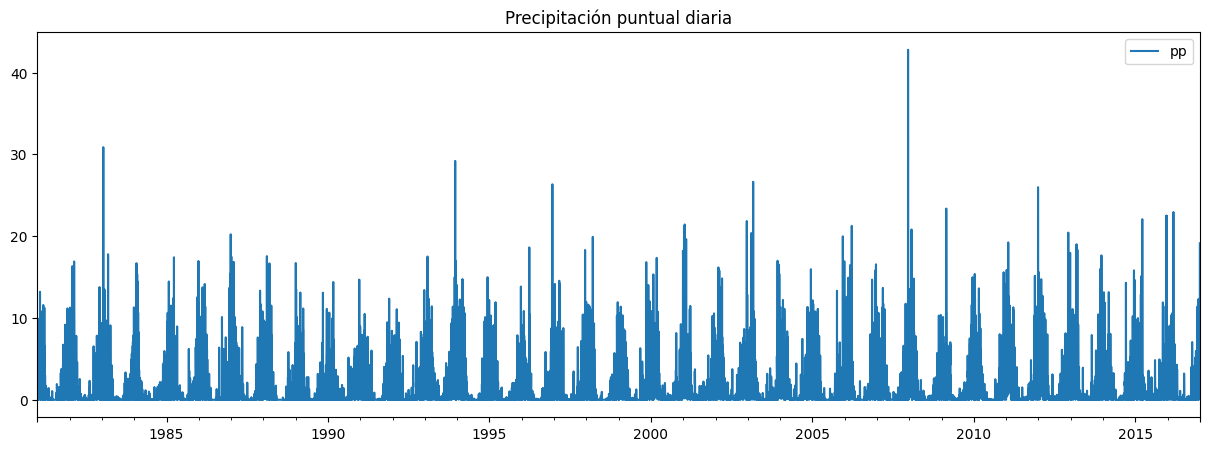

In [39]:
df2.plot(figsize = (15, 5), title = "Precipitación puntual diaria");

In [11]:
%%capture
!wget https://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Temp/.v1p1/.tmax/.stable/.monthly/.tmax/data.nc
os.rename("data.nc", "tp_max_monthly.nc")
!wget https://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Temp/.v1p1/.tmin/.stable/.monthly/data.nc
os.rename("data.nc", "tp_min_monthly.nc")

In [35]:
temp_min = Point_PP("tp_min_monthly.nc", -73.23, -10.14, "tmin", "ME")

temp_max = Point_PP("tp_max_monthly.nc", -73.23, -10.14, "tmax", "ME")

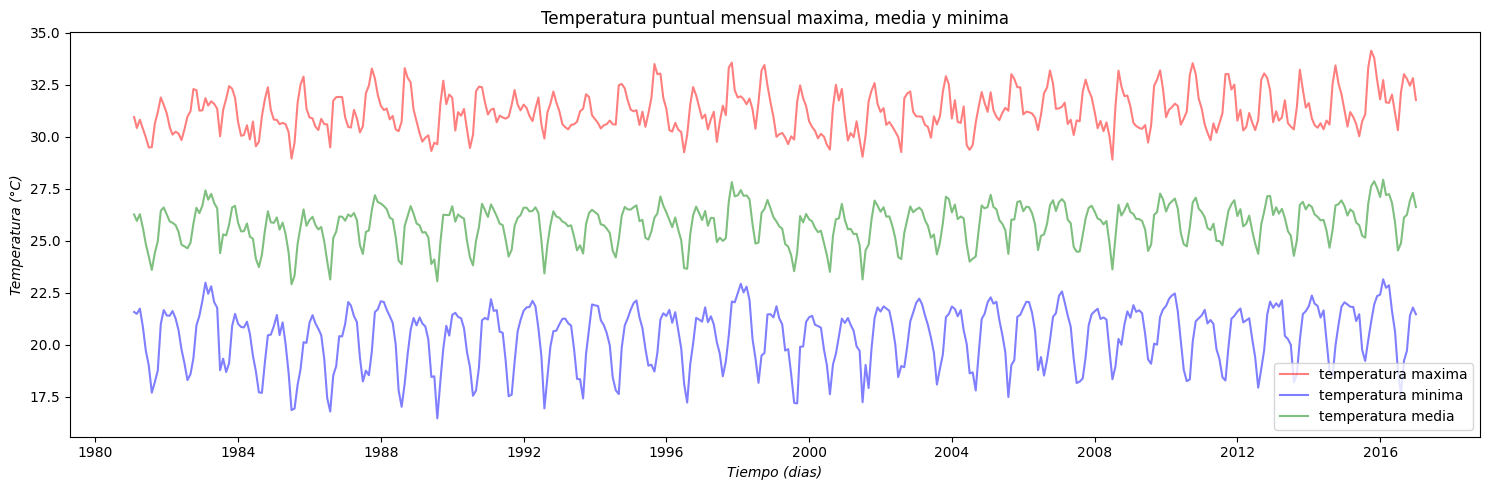

In [38]:
plt.figure(figsize = (15, 5))

plt.plot(temp_max, "r-", label = "temperatura maxima", alpha = 0.5)

plt.plot(temp_min, "b-", label = "temperatura minima", alpha = 0.5)

plt.plot((temp_max + temp_min)*0.5, "g-", label = "temperatura media", alpha = 0.5)

plt.title("Temperatura puntual mensual maxima, media y minima")

plt.xlabel("Tiempo (meses)", style = "italic")

plt.ylabel("Temperatura (°C)", style = "italic")

plt.legend()

plt.tight_layout()

plt.show()

In [14]:
%%capture
!wget https://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Temp/.v1p1/.tmax/.stable/.daily/.tmax/data.nc
os.rename("data.nc", "tp_max_daily.nc")
!wget https://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Temp/.v1p1/.tmin/.stable/.daily/.tmin/data.nc
os.rename("data.nc", "tp_min_daily.nc")

In [41]:
temp_max_dailyb = Point_PP("tp_max_daily.nc", -68.48877, -10.15, "tmax", "d")

temp_min_dailyb = Point_PP("tp_min_daily.nc", -73.25, -10.15, "tmin", "d")

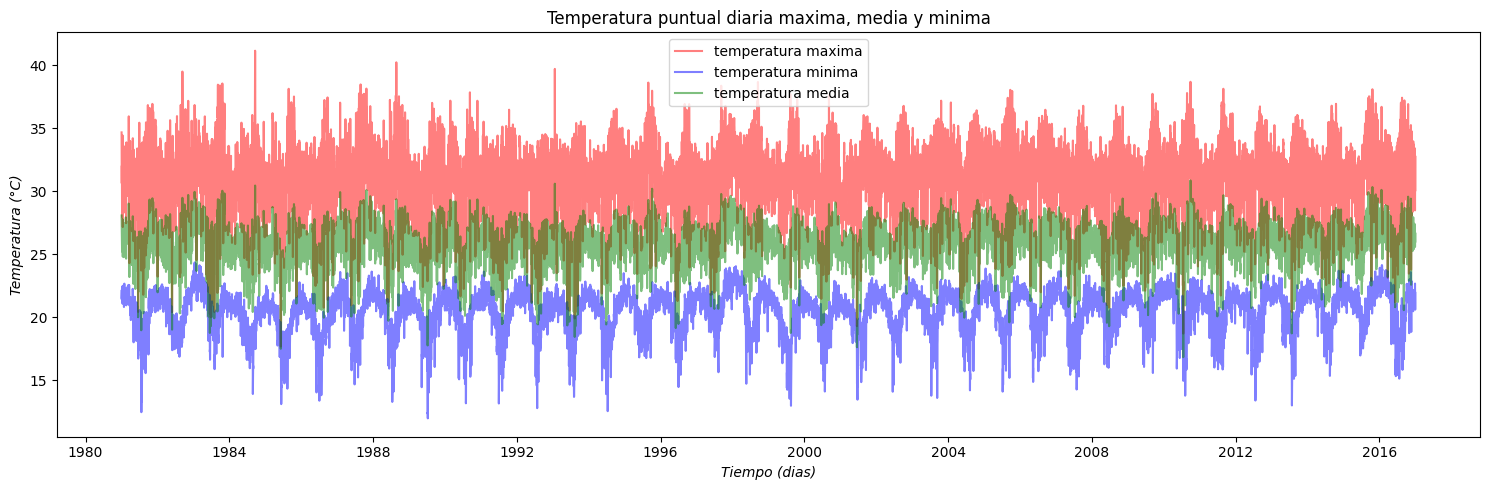

In [43]:
plt.figure(figsize = (15, 5))

plt.plot(temp_max_dailyb, "r-", label = "temperatura maxima", alpha = 0.5)

plt.plot(temp_min_dailyb, "b-", label = "temperatura minima", alpha = 0.5)

plt.plot((temp_min_dailyb + temp_max_dailyb)*0.5, "g-", label = "temperatura media", alpha = 0.5)

plt.title("Temperatura puntual diaria maxima, media y minima")

plt.xlabel("Tiempo (dias)", style = "italic")

plt.ylabel("Temperatura (°C)", style = "italic")

plt.legend()

plt.tight_layout()

plt.show()